In [6]:
import numpy as np
import util

In [7]:
def sigmoid(z):
    return 1/(1 + np.power(np.e,-z))

def normalise(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [8]:
class GDA:
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y by updating
        self.theta.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        n = x.shape[0]
        m = x.shape[1]
        x = x.reshape((n, m))
        y = y.reshape((n, 1))
        
        # Find phi, mu_0, mu_1, and sigma
        phi = np.sum(y)/n
        mu_0 = np.sum((1-y)*x, axis=0)/np.sum(1-y)
        mu_1 = np.sum(y*x, axis=0)/np.sum(y)
        sigma = np.zeros((m,m))
        for i in range(n):
            vec = (x[i] - y[i]*mu_1 - (1-y[i])*mu_0).reshape(2,1)
            sigma_i = vec @ vec.T
            sigma += (1/n)*sigma_i
        sigma_inv = np.linalg.inv(sigma)
        
        # Write theta in terms of the parameters
        self.theta = sigma_inv @ (mu_1 - mu_0)
        self.theta_0 = 0.5*(mu_0-mu_1)@sigma_inv@(mu_1 + mu_0) + np.log(phi/(1-phi))
        
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        return sigmoid(x@self.theta + self.theta_0)

# if __name__ == '__main__':
#     main(train_path='ds1_train.csv',
#          valid_path='ds1_valid.csv',
#          save_path='gda_pred_1.txt')

#     main(train_path='ds2_train.csv',
#          valid_path='ds2_valid.csv',
#          save_path='gda_pred_2.txt')


In [35]:
def main(train_path, valid_path, save_path):
    """Problem: Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_valid, y_valid = util.load_dataset(valid_path, add_intercept=True)

    x_train[:, 1] = np.log(x_train[:, 1])
    x_valid[:, 2] = np.log(x_valid[:,2])
#     x_train = normalise(x_train)
#     x_valid[:, 1:] = normalise(x_valid[:, 1:])
    # *** START CODE HERE ***
    # Train a GDA classifier
    gda = GDA()
    gda.fit(x_train, y_train)
    # Predict for validation
#     y_pred_valid = gda.predict(x_valid)
    
    # Plot decision boundary on validation set
    theta = np.append(gda.theta_0, gda.theta)
    util.plot(x_valid, y_valid, theta, save_path=None)
    # Use np.savetxt to save outputs from validation set to save_path
    # *** END CODE HERE ***

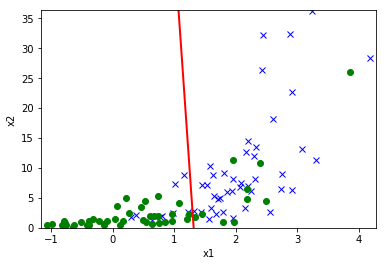

In [26]:
main(train_path='ds1_train.csv',
     valid_path='ds1_valid.csv',
     save_path='gda_pred_1.txt')

# main(train_path='ds2_train.csv',
#      valid_path='ds2_valid.csv',
#      save_path='gda_pred_2.txt')

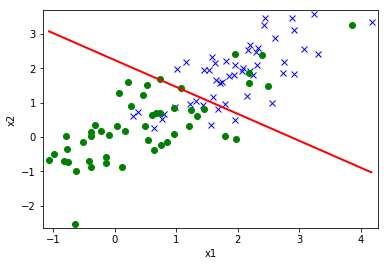

In [36]:
main(train_path='ds1_train.csv',
     valid_path='ds1_valid.csv',
     save_path='gda_pred_1.txt')